In [32]:
import numpy as np
import umap
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D 
import warnings
warnings.filterwarnings('ignore')

In [21]:
#sns.set(style='white', context='notebook')

In [22]:
df = pd.read_csv("../data/DoE_Data_1_4.csv", index_col=0)
df

,ID,datetime,Annealing H2 (sccm),Growth H2 (sccm),Growth CH4 (sccm),Growth He (sccm),Cooling H2 (sccm),Cooling CH4 (sccm),Cooling He (sccm),Growth Time (min),Dew Point (C),Temperature (C),Relative Humidity (pct),Res: Graphene Presence,CP: Total Flow Rate (sccm),CP: CH4/Total,CP: CH4/H2,CP: Dil CH4,CP: Set No,Res: pct. Coverage
0,20191211_1,12/11/19 0:00,100,100,1.00000,100.00000,0,0.00000,100.00000,15.0,NaN,NaN,NaN,No,201.000,0.004975,0.010000,False,1,0.00000
1,20191211_2,12/11/19 0:00,500,500,5.00000,500.00000,0,0.00000,500.00000,15.0,NaN,NaN,NaN,Yes,1005.000,0.004975,0.010000,False,1,0.53439
2,20191211_3,12/11/19 0:00,500,500,5.00000,500.00000,0,0.00000,500.00000,5.0,NaN,NaN,NaN,No,1005.000,0.004975,0.010000,False,1,0.00000
3,20191216_2,12/16/19 0:00,500,500,5.00000,500.00000,0,0.00000,500.00000,5.0,NaN,NaN,NaN,No,1005.000,0.004975,0.010000,False,1,0.00000
4,20191216_3,12/16/19 0:00,100,100,1.00000,100.00000,0,0.00000,100.00000,15.0,NaN,NaN,NaN,Maybe,201.000,0.004975,0.010000,False,1,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,20210114_1,01/14/21 7:30,25,25,0.01716,476.69884,25,0.01716,476.69884,7.5,0.26,21.7,24.030716,Maybe,501.716,0.000034,0.000686,True,4,0.00000
104,20210114_2,01/14/21 10:00,25,25,0.01716,476.69884,25,0.01716,476.69884,10.0,1.30,22.9,24.077087,No,501.716,0.000034,0.000686,True,4,0.00000
105,20210115_1,01/15/21 9:00,50,50,0.03432,953.39768,50,0.03432,953.39768,5.0,1.10,22.0,25.068069,No,1003.432,0.000034,0.000686,True,4,0.00000
106,20210120_1,01/20/21 9:00,50,50,0.03432,953.39768,50,0.03432,953.39768,7.5,-4.82,22.0,16.209052,No,1003.432,0.000034,0.000686,True,4,0.00000


In [23]:
df = df.dropna()

In [24]:
df

,ID,datetime,Annealing H2 (sccm),Growth H2 (sccm),Growth CH4 (sccm),Growth He (sccm),Cooling H2 (sccm),Cooling CH4 (sccm),Cooling He (sccm),Growth Time (min),Dew Point (C),Temperature (C),Relative Humidity (pct),Res: Graphene Presence,CP: Total Flow Rate (sccm),CP: CH4/Total,CP: CH4/H2,CP: Dil CH4,CP: Set No,Res: pct. Coverage
11,20200131_1,01/31/20 0:00,100,100,1.00000,100.00000,0,0.00000,100.00000,5.0,1.90,23.2,24.681526,Maybe,201.000,0.004975,0.010000,False,1,0.000000
12,20200201_1,02/01/20 0:00,100,100,1.00000,100.00000,0,0.00000,100.00000,5.0,1.74,23.0,24.697922,No,201.000,0.004975,0.010000,False,1,0.000000
13,20200202_1,02/02/20 0:00,500,500,5.00000,500.00000,0,0.00000,500.00000,5.0,5.30,23.1,31.548652,Yes,1005.000,0.004975,0.010000,False,1,0.627440
14,20200207_1,02/07/20 0:00,100,100,1.00000,100.00000,0,0.00000,100.00000,5.0,-1.86,23.2,18.791646,No,201.000,0.004975,0.010000,False,1,0.000000
15,20200207_2,02/07/20 0:00,500,500,5.00000,500.00000,0,0.00000,500.00000,15.0,-1.86,23.2,18.791646,Yes,1005.000,0.004975,0.010000,False,1,0.095754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,20210114_1,01/14/21 7:30,25,25,0.01716,476.69884,25,0.01716,476.69884,7.5,0.26,21.7,24.030716,Maybe,501.716,0.000034,0.000686,True,4,0.000000
104,20210114_2,01/14/21 10:00,25,25,0.01716,476.69884,25,0.01716,476.69884,10.0,1.30,22.9,24.077087,No,501.716,0.000034,0.000686,True,4,0.000000
105,20210115_1,01/15/21 9:00,50,50,0.03432,953.39768,50,0.03432,953.39768,5.0,1.10,22.0,25.068069,No,1003.432,0.000034,0.000686,True,4,0.000000
106,20210120_1,01/20/21 9:00,50,50,0.03432,953.39768,50,0.03432,953.39768,7.5,-4.82,22.0,16.209052,No,1003.432,0.000034,0.000686,True,4,0.000000


In [25]:
df = df.set_index([pd.Index(np.array(range(97)))])
df.g_pres = df['Res: Graphene Presence']

In [26]:
df

,ID,datetime,Annealing H2 (sccm),Growth H2 (sccm),Growth CH4 (sccm),Growth He (sccm),Cooling H2 (sccm),Cooling CH4 (sccm),Cooling He (sccm),Growth Time (min),Dew Point (C),Temperature (C),Relative Humidity (pct),Res: Graphene Presence,CP: Total Flow Rate (sccm),CP: CH4/Total,CP: CH4/H2,CP: Dil CH4,CP: Set No,Res: pct. Coverage
0,20200131_1,01/31/20 0:00,100,100,1.00000,100.00000,0,0.00000,100.00000,5.0,1.90,23.2,24.681526,Maybe,201.000,0.004975,0.010000,False,1,0.000000
1,20200201_1,02/01/20 0:00,100,100,1.00000,100.00000,0,0.00000,100.00000,5.0,1.74,23.0,24.697922,No,201.000,0.004975,0.010000,False,1,0.000000
2,20200202_1,02/02/20 0:00,500,500,5.00000,500.00000,0,0.00000,500.00000,5.0,5.30,23.1,31.548652,Yes,1005.000,0.004975,0.010000,False,1,0.627440
3,20200207_1,02/07/20 0:00,100,100,1.00000,100.00000,0,0.00000,100.00000,5.0,-1.86,23.2,18.791646,No,201.000,0.004975,0.010000,False,1,0.000000
4,20200207_2,02/07/20 0:00,500,500,5.00000,500.00000,0,0.00000,500.00000,15.0,-1.86,23.2,18.791646,Yes,1005.000,0.004975,0.010000,False,1,0.095754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,20210114_1,01/14/21 7:30,25,25,0.01716,476.69884,25,0.01716,476.69884,7.5,0.26,21.7,24.030716,Maybe,501.716,0.000034,0.000686,True,4,0.000000
93,20210114_2,01/14/21 10:00,25,25,0.01716,476.69884,25,0.01716,476.69884,10.0,1.30,22.9,24.077087,No,501.716,0.000034,0.000686,True,4,0.000000
94,20210115_1,01/15/21 9:00,50,50,0.03432,953.39768,50,0.03432,953.39768,5.0,1.10,22.0,25.068069,No,1003.432,0.000034,0.000686,True,4,0.000000
95,20210120_1,01/20/21 9:00,50,50,0.03432,953.39768,50,0.03432,953.39768,7.5,-4.82,22.0,16.209052,No,1003.432,0.000034,0.000686,True,4,0.000000


In [27]:
#df.insert(13, 'Graphene Grade', )

In [28]:
df.g_pres.value_counts()

No       52
Yes      34
Maybe    11
Name: Res: Graphene Presence, dtype: int64

In [29]:
#sns.pairplot(df, hue='Graphene Grade')

# UMAP vs t-SNE

In [30]:
reducer = umap.UMAP()

AttributeError: module 'umap' has no attribute 'UMAP'

In [31]:
df_data = df.iloc[:,2:13].values
scaled_df_data = StandardScaler().fit_transform(df_data)

In [17]:
#print('df data: \n', df_data)
#print('\n \n scaled df data: \n', scaled_df_data)

In [18]:
scaled_df_data.shape

(97, 11)

In [19]:
embedding = reducer.fit_transform(scaled_df_data)
embedding.shape

NameError: name 'reducer' is not defined

In [17]:
#embedding
#(np.unique(df.g_pres))[0:3]

In [18]:
#plt.scatter(
#    embedding[:, 0],
#    embedding[:, 1],
#    c=df['Graphene Presence'])
#plt.gca().set_aspect('equal', 'datalim')
#plt.title('UMAP projection of the DoE Set', fontsize=18)
#plt.legend(('Maybe', 'Yes', 'No'))

In [19]:
df['umap_x'] = embedding[:, 0]
df['umap_y'] = embedding[:, 1]
df

,ID,datetime,Annealing H2 (sccm),Growth H2 (sccm),Growth CH4 (sccm),Growth He (sccm),Cooling H2 (sccm),Cooling CH4 (sccm),Cooling He (sccm),Growth Time (min),...,Temperature (C),Relative Humidity (pct),Res: Graphene Presence,CP: Total Flow Rate (sccm),CP: CH4/Total,CP: CH4/H2,CP: Dil CH4,CP: Set No,umap_x,umap_y
0,20200131_1,2020-01-31 00:00:00,100.0,100.0,1.00000,100.00000,0,0.00000,100.00000,5.0,...,23.2,24.681526,Maybe,201.000,0.004975,0.010000,False,1,2.192205,2.238657
1,20200201_1,2020-02-01 00:00:00,100.0,100.0,1.00000,100.00000,0,0.00000,100.00000,5.0,...,23.0,24.697922,No,201.000,0.004975,0.010000,False,1,2.339431,1.908252
2,20200202_1,2020-02-02 00:00:00,500.0,500.0,5.00000,500.00000,0,0.00000,500.00000,5.0,...,23.1,31.548652,Yes,1005.000,0.004975,0.010000,False,1,7.505959,-0.948557
3,20200207_1,2020-02-07 00:00:00,100.0,100.0,1.00000,100.00000,0,0.00000,100.00000,5.0,...,23.2,18.791646,No,201.000,0.004975,0.010000,False,1,2.248865,2.318767
4,20200207_2,2020-02-07 00:00:00,500.0,500.0,5.00000,500.00000,0,0.00000,500.00000,15.0,...,23.2,18.791646,Yes,1005.000,0.004975,0.010000,False,1,7.575282,-0.942008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,20210114_1,2021-01-14 07:30:00,50.0,25.0,0.01716,476.69884,25,0.01716,476.69884,7.5,...,21.7,24.030716,Maybe,501.716,0.000034,0.000686,True,4,12.142005,7.948441
93,20210114_2,2021-01-14 10:00:00,50.0,25.0,0.01716,476.69884,25,0.01716,476.69884,10.0,...,22.9,24.077087,No,501.716,0.000034,0.000686,True,4,12.568692,7.875369
94,20210115_1,2021-01-15 09:00:00,50.0,50.0,0.03432,953.39768,50,0.03432,953.39768,5.0,...,22.0,25.068069,No,1003.432,0.000034,0.000686,True,4,12.264922,5.540630
95,20210120_1,2021-01-20 09:00:00,50.0,50.0,0.03432,953.39768,50,0.03432,953.39768,7.5,...,22.0,16.209052,No,1003.432,0.000034,0.000686,True,4,12.379144,5.908617


In [20]:
X_embedded = TSNE(n_components=2).fit_transform(scaled_df_data)
X_embedded.shape

(97, 2)

In [21]:
df['tsne_x'] = X_embedded[:, 0]
df['tsne_y'] = X_embedded[:, 1]
df

,ID,datetime,Annealing H2 (sccm),Growth H2 (sccm),Growth CH4 (sccm),Growth He (sccm),Cooling H2 (sccm),Cooling CH4 (sccm),Cooling He (sccm),Growth Time (min),...,Res: Graphene Presence,CP: Total Flow Rate (sccm),CP: CH4/Total,CP: CH4/H2,CP: Dil CH4,CP: Set No,umap_x,umap_y,tsne_x,tsne_y
0,20200131_1,2020-01-31 00:00:00,100.0,100.0,1.00000,100.00000,0,0.00000,100.00000,5.0,...,Maybe,201.000,0.004975,0.010000,False,1,2.192205,2.238657,-3.168037,-2.131267
1,20200201_1,2020-02-01 00:00:00,100.0,100.0,1.00000,100.00000,0,0.00000,100.00000,5.0,...,No,201.000,0.004975,0.010000,False,1,2.339431,1.908252,-3.206821,-2.281499
2,20200202_1,2020-02-02 00:00:00,500.0,500.0,5.00000,500.00000,0,0.00000,500.00000,5.0,...,Yes,1005.000,0.004975,0.010000,False,1,7.505959,-0.948557,-2.067586,4.375183
3,20200207_1,2020-02-07 00:00:00,100.0,100.0,1.00000,100.00000,0,0.00000,100.00000,5.0,...,No,201.000,0.004975,0.010000,False,1,2.248865,2.318767,-3.587557,-2.781163
4,20200207_2,2020-02-07 00:00:00,500.0,500.0,5.00000,500.00000,0,0.00000,500.00000,15.0,...,Yes,1005.000,0.004975,0.010000,False,1,7.575282,-0.942008,-2.686016,4.576282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,20210114_1,2021-01-14 07:30:00,50.0,25.0,0.01716,476.69884,25,0.01716,476.69884,7.5,...,Maybe,501.716,0.000034,0.000686,True,4,12.142005,7.948441,-2.074510,-6.265801
93,20210114_2,2021-01-14 10:00:00,50.0,25.0,0.01716,476.69884,25,0.01716,476.69884,10.0,...,No,501.716,0.000034,0.000686,True,4,12.568692,7.875369,-1.641411,-6.813666
94,20210115_1,2021-01-15 09:00:00,50.0,50.0,0.03432,953.39768,50,0.03432,953.39768,5.0,...,No,1003.432,0.000034,0.000686,True,4,12.264922,5.540630,-2.717528,-9.872366
95,20210120_1,2021-01-20 09:00:00,50.0,50.0,0.03432,953.39768,50,0.03432,953.39768,7.5,...,No,1003.432,0.000034,0.000686,True,4,12.379144,5.908617,-3.272006,-9.171334


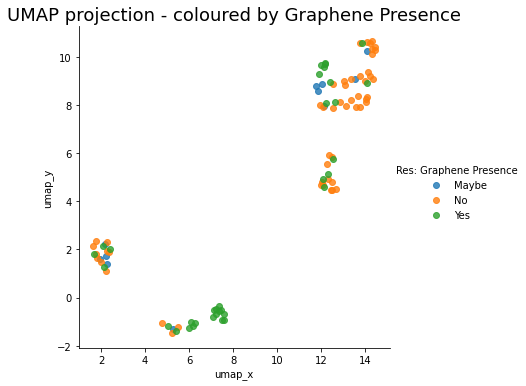

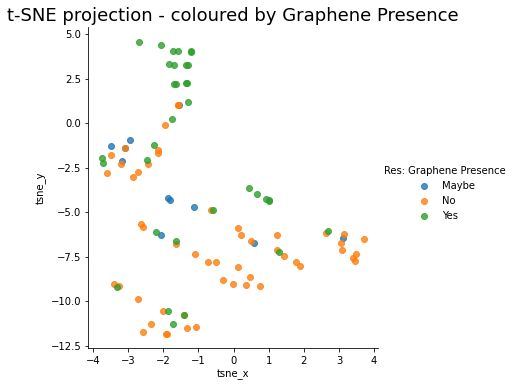

In [22]:
sns.lmplot('umap_x', 'umap_y', data=df, hue='Res: Graphene Presence', fit_reg=False)
plt.title('UMAP projection - coloured by Graphene Presence', fontsize=18)
sns.lmplot('tsne_x', 'tsne_y', data=df, hue='Res: Graphene Presence', fit_reg=False)
plt.title('t-SNE projection - coloured by Graphene Presence', fontsize=18)
plt.show()

In [23]:
#plt.scatter(df['umap_x'],df['umap_y'], c=df['CP: Total Flow Rate (sccm)'])
#plt.colorbar()
#plt.show()

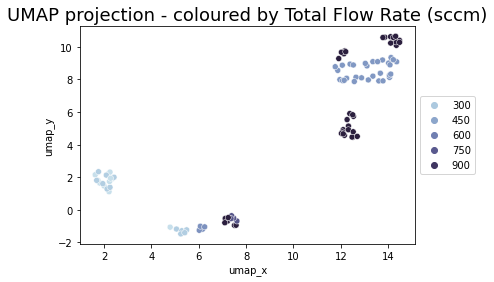

In [24]:
g1 = sns.scatterplot(data=df, x='umap_x', y='umap_y', hue='CP: Total Flow Rate (sccm)', palette=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True))
g1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('UMAP projection - coloured by Total Flow Rate (sccm)', fontsize=18)
plt.show()

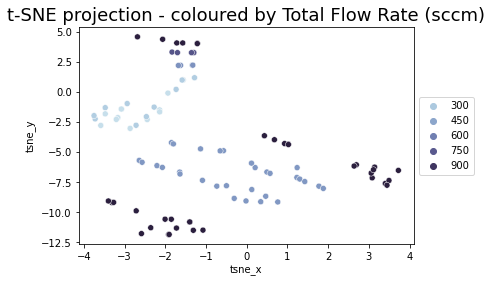

In [25]:
g1t = sns.scatterplot(data=df, x='tsne_x', y='tsne_y', hue='CP: Total Flow Rate (sccm)', palette=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True))
g1t.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('t-SNE projection - coloured by Total Flow Rate (sccm)', fontsize=18)
plt.show()

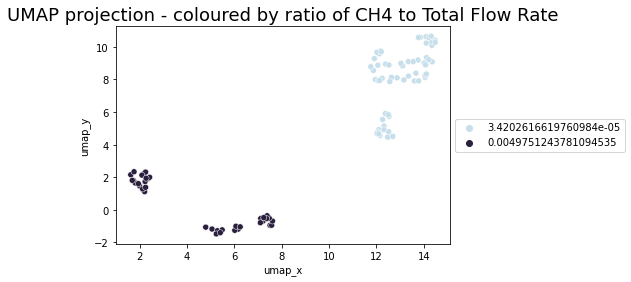

In [26]:
g2 = sns.scatterplot(data=df, x='umap_x', y='umap_y', hue='CP: CH4/Total', palette=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True))
g2.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('UMAP projection - coloured by ratio of CH4 to Total Flow Rate', fontsize=18)
plt.show()

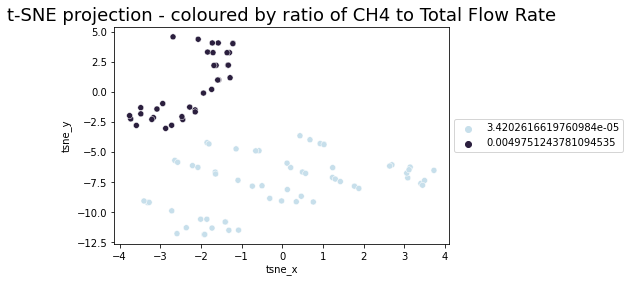

In [27]:
g2t = sns.scatterplot(data=df, x='tsne_x', y='tsne_y', hue='CP: CH4/Total', palette=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True))
g2t.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('t-SNE projection - coloured by ratio of CH4 to Total Flow Rate', fontsize=18)
plt.show()

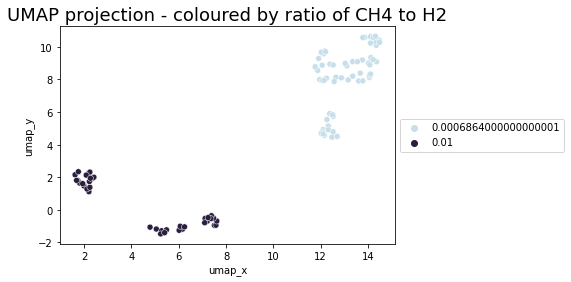

In [28]:
g3 = sns.scatterplot(data=df, x='umap_x', y='umap_y', hue='CP: CH4/H2', palette=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True))
g3.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('UMAP projection - coloured by ratio of CH4 to H2', fontsize=18)
plt.show()

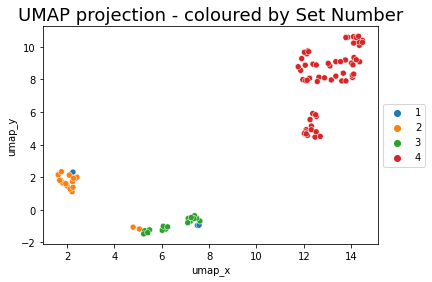

In [29]:
g4 = sns.scatterplot(data=df, x='umap_x', y='umap_y', hue='CP: Set No', palette=sns.color_palette()[0:4])
g4.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('UMAP projection - coloured by Set Number', fontsize=18)
plt.show()

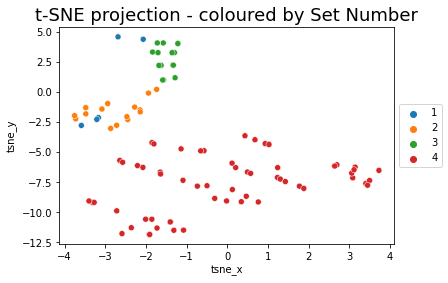

In [30]:
g4t = sns.scatterplot(data=df, x='tsne_x', y='tsne_y', hue='CP: Set No', palette=sns.color_palette()[0:4])
g4t.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('t-SNE projection - coloured by Set Number', fontsize=18)
plt.show()

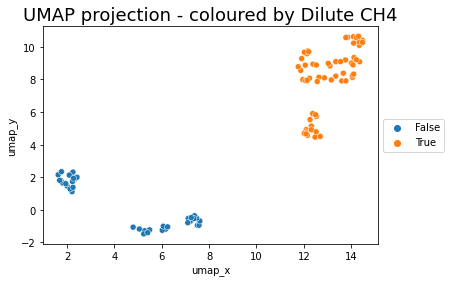

In [31]:
g5 = sns.scatterplot(data=df, x='umap_x', y='umap_y', hue='CP: Dil CH4')
g5.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('UMAP projection - coloured by Dilute CH4', fontsize=18)
plt.show()

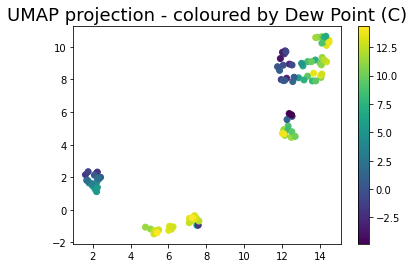

In [32]:
plt.scatter(df['umap_x'],df['umap_y'], c=df['Dew Point (C)'])
plt.colorbar()
plt.title('UMAP projection - coloured by Dew Point (C)', fontsize=18)
plt.show()

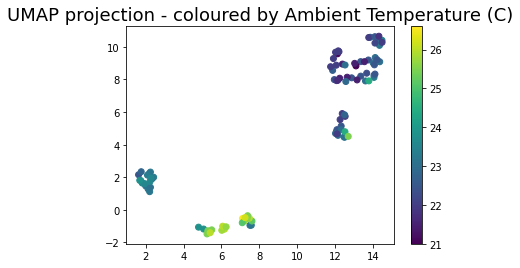

In [33]:
plt.scatter(df['umap_x'],df['umap_y'], c=df['Temperature (C)'])
plt.colorbar()
plt.title('UMAP projection - coloured by Ambient Temperature (C)', fontsize=18)
plt.show()

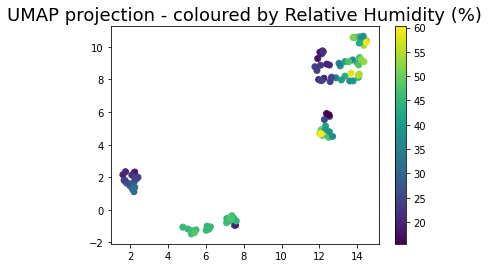

In [34]:
plt.scatter(df['umap_x'],df['umap_y'], c=df['Relative Humidity (pct)'])
plt.colorbar()
plt.title('UMAP projection - coloured by Relative Humidity (%)', fontsize=18)
plt.show()

# UMAP - new
- One excluded
- All included
- 'Maybe' graded as 'Yes' and 'No'

In [35]:
dfnew = df.iloc[:,:-4]

In [36]:
def f_neutral(val):
    if val == 'Yes':
        return 1
    elif val == 'No':
        return 0
    elif val == 'Maybe':
        return 0.5
    
def f_positive(val):
    if val == 'Yes':
        return 1
    elif val == 'No':
        return 0
    elif val == 'Maybe':
        return 1

def f_negative(val):
    if val == 'Yes':
        return 1
    elif val == 'No':
        return 0
    elif val == 'Maybe':
        return 0

In [37]:
dfnew['Res: Neutral Grade'] = dfnew['Res: Graphene Presence'].apply(f_neutral)
dfnew['Res: Positive Grade'] = dfnew['Res: Graphene Presence'].apply(f_positive)
dfnew['Res: Negative Grade'] = dfnew['Res: Graphene Presence'].apply(f_negative)

dfnew.shape

(97, 22)

In [38]:
#df_data = df.iloc[:,2:13].values
#scaled_df_data = StandardScaler().fit_transform(df_data)

dfnew_neutral_data = dfnew.iloc[:, pd.np.r_[2:13, 14:19, -3]]
dfnew_positive_data = dfnew.iloc[:, pd.np.r_[2:13, 14:19, -2]]
dfnew_negative_data = dfnew.iloc[:, pd.np.r_[2:13, 14:19, -1]]

#scaled_dfnew_neutral_data = StandardScaler().fit_transform(dfnew_neutral_data)
#scaled_dfnew_positive_data = StandardScaler().fit_transform(dfnew_positive_data)
#scaled_dfnew_negative_data = StandardScaler().fit_transform(dfnew_negative_data)

In [39]:
def umap_one_excl(df_data, df, col_name, drop_name=['Relative Humidity (pct)','CP: Total Flow Rate (sccm)','CP: CH4/Total','CP: CH4/H2','CP: Dil CH4','CP: Set No']):
    df_data_func = df_data.drop([col_name]+drop_name, axis=1)
    #print(df_data_func.head())
    print('df_data_func shape',df_data_func.shape)
    df_func = df.copy()
    print('df_func shape',df_func.shape)
    print('df shape',df.shape)
    reducer = umap.UMAP()
    scaled_df_data = StandardScaler().fit_transform(df_data_func)
    embedding = reducer.fit_transform(scaled_df_data)
    print('embedding shape',embedding.shape)
    df_func['umap_x'] = embedding[:, 0]
    df_func['umap_y'] = embedding[:, 1]
    plt.figure(figsize=(8,6))
    plt.scatter(df_func['umap_x'],df_func['umap_y'], c=df_func[col_name])
    #plt.rcParams['font.size'] = '12'
    plt.colorbar()
    plt.title('UMAP projection (excluding coloured paramater) - coloured by %s'%col_name, fontsize=18)
    plt.show()

df_data_func shape (97, 10)
df_func shape (97, 22)
df shape (97, 22)
embedding shape (97, 2)


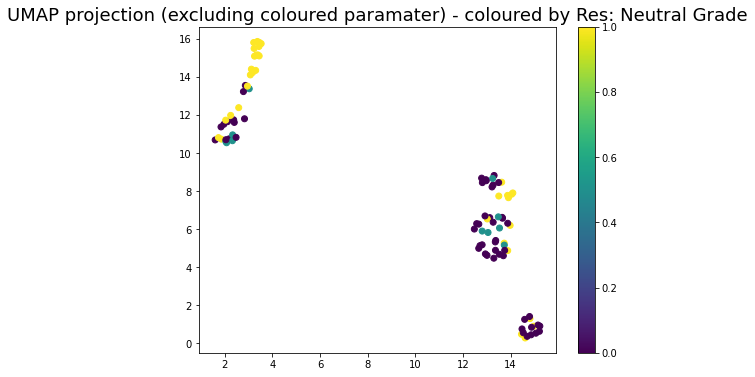

In [40]:
umap_one_excl(dfnew_neutral_data, dfnew, 'Res: Neutral Grade')

df_data_func shape (97, 10)
df_func shape (97, 22)
df shape (97, 22)
embedding shape (97, 2)


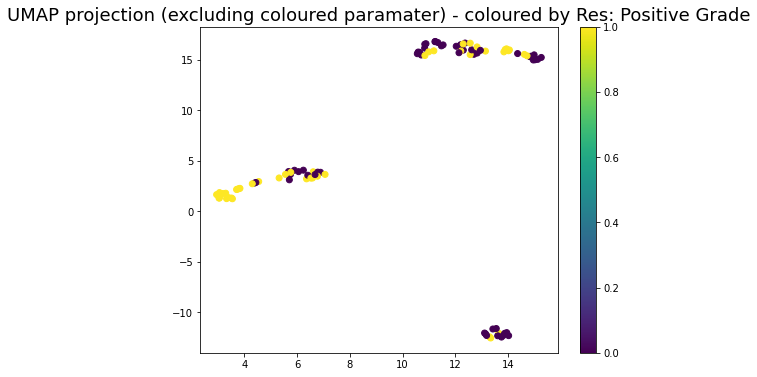

In [41]:
umap_one_excl(dfnew_positive_data, dfnew, 'Res: Positive Grade')

df_data_func shape (97, 10)
df_func shape (97, 22)
df shape (97, 22)
embedding shape (97, 2)


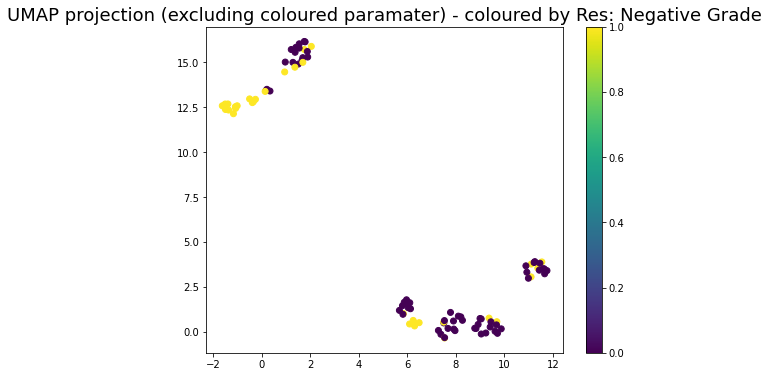

In [42]:
umap_one_excl(dfnew_negative_data, dfnew, 'Res: Negative Grade')

df_data_func shape (97, 10)
df_func shape (97, 22)
df shape (97, 22)
embedding shape (97, 2)


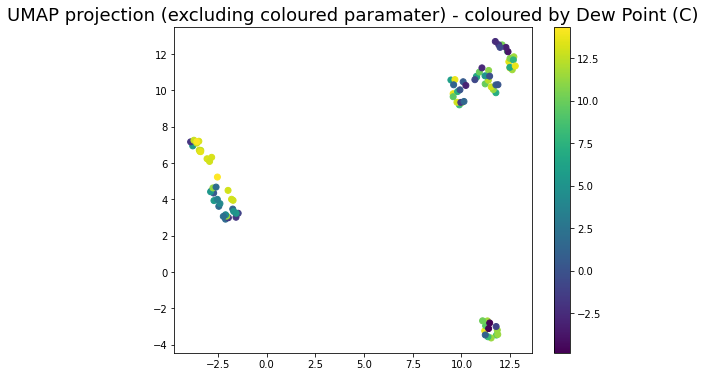

In [43]:
umap_one_excl(dfnew_neutral_data, dfnew, 'Dew Point (C)')

In [44]:
def umap_incl(df_data, df, col_name, drop_name=['Relative Humidity (pct)','CP: Total Flow Rate (sccm)','CP: CH4/Total','CP: CH4/H2','CP: Dil CH4','CP: Set No']):
    df_data_func = df_data.drop(drop_name, axis=1)
    #print(df_data_func.head())
    print('df_data_func shape',df_data_func.shape)
    df_func = df.copy()
    print('df_func shape',df_func.shape)
    print('df shape',df.shape)
    reducer = umap.UMAP()
    scaled_df_data = StandardScaler().fit_transform(df_data_func)
    embedding = reducer.fit_transform(scaled_df_data)
    print('embedding shape',embedding.shape)
    df_func['umap_x'] = embedding[:, 0]
    df_func['umap_y'] = embedding[:, 1]
    plt.figure(figsize=(8,6))
    plt.scatter(df_func['umap_x'],df_func['umap_y'], c=df_func[col_name])
    plt.colorbar()
    plt.title('UMAP projection (all inclusive) - coloured by %s'%col_name, fontsize=18)
    plt.show()

df_data_func shape (97, 11)
df_func shape (97, 22)
df shape (97, 22)
embedding shape (97, 2)


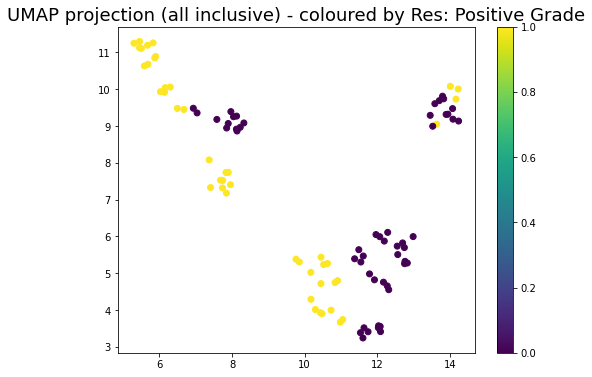

In [45]:
umap_incl(dfnew_positive_data, dfnew, 'Res: Positive Grade')

df_data_func shape (97, 11)
df_func shape (97, 22)
df shape (97, 22)
embedding shape (97, 2)


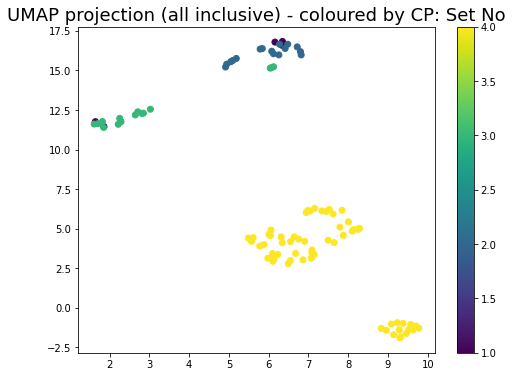

In [46]:
umap_incl(dfnew_negative_data, dfnew, 'CP: Set No')

df_data_func shape (97, 11)
df_func shape (97, 22)
df shape (97, 22)
embedding shape (97, 2)


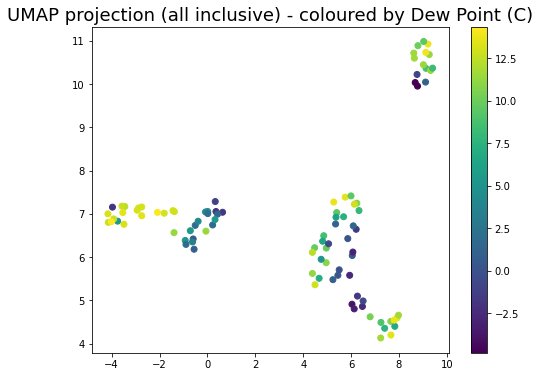

In [47]:
umap_incl(dfnew_neutral_data, dfnew, 'Dew Point (C)')

# PCA

In [48]:
dfnew.shape

(97, 22)

In [49]:
dfpca_neutral_data = dfnew.iloc[:, pd.np.r_[2:13, 14:19, -3]]
dfpca_positive_data = dfnew.iloc[:, pd.np.r_[2:13, 14:19, -2]]
dfpca_negative_data = dfnew.iloc[:, pd.np.r_[2:13, 14:19, -1]]

In [53]:
def pca_one_excl(df_data, df, col_name, drop_name=['Relative Humidity (pct)','CP: Total Flow Rate (sccm)','CP: CH4/Total','CP: CH4/H2','CP: Dil CH4','CP: Set No'], components=2):
    df_data_func = (df_data.drop([col_name]+drop_name, axis=1))
    #print(df_data_func.head())
    print('df_data_func shape',df_data_func.shape)
    df_func = df.copy()
    print('df_func shape',df_func.shape)
    print('df shape',df.shape)
    
    scaled_df_data = StandardScaler().fit_transform(df_data_func)
    
    pca = PCA(n_components=components)
    principalComponents = pca.fit_transform(scaled_df_data)
    
    principalDf_columns = []
    for i in range(components):
        principalDf_columns.append('principal component %i' %(i+1))
    
    principalDf = pd.DataFrame(data = principalComponents
             , columns = principalDf_columns)
    
    principalDf.to_csv('PCA_points.csv')
    
    plt.figure(figsize=(8,6))
    plt.scatter(principalDf['principal component 1'],principalDf['principal component 2'], c=df_func[col_name])
    plt.colorbar()
    #plt.title('UMAP projection (excluding coloured paramater) - coloured by %s'%col_name, fontsize=18)
    plt.show()
    print('\nPCA Components Size: ', pca.components_.shape)
    print('\nPrincipal Component Names: ', df_data_func.columns)
    print('\nPrincipal Components:')
    for i in range(components):
        print('\n%i: ' %(i+1), pca.components_[i])
    print('\nExplained Variance:', pca.explained_variance_)
    print('\nExplained Variance Ratio:', pca.explained_variance_ratio_)
    print('\nSingular Values:', pca.singular_values_)

In [54]:
print('a')
type(dfpca_neutral_data.columns)
#print('b')

a


pandas.core.indexes.base.Index

df_data_func shape (97, 11)
df_func shape (97, 22)
df shape (97, 22)


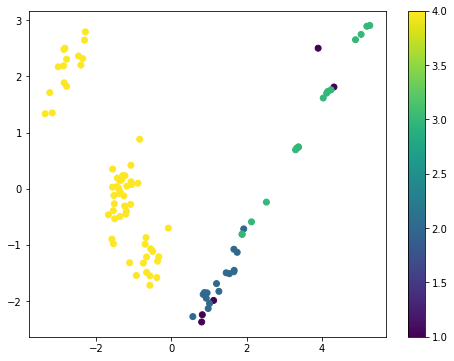


PCA Components Size:  (10, 11)

Principal Component Names:  Index(['Annealing H2 (sccm)', 'Growth H2 (sccm)', 'Growth CH4 (sccm)',
       'Growth He (sccm)', 'Cooling H2 (sccm)', 'Cooling CH4 (sccm)',
       'Cooling He (sccm)', 'Growth Time (min)', 'Dew Point (C)',
       'Temperature (C)', 'Res: Neutral Grade'],
      dtype='object')

Principal Components:

1:  [ 0.39591008  0.39380953  0.41214814 -0.29058233 -0.29135807 -0.29135807
 -0.29065866 -0.06144181  0.10838681  0.33470846  0.22814695]

2:  [0.27638382 0.2874132  0.22973797 0.40567998 0.36601968 0.36601968
 0.40691596 0.19531511 0.26080449 0.21043559 0.19919423]

3:  [ 0.07005105  0.06748004  0.04458739  0.17654399 -0.22428691 -0.22428691
  0.17545115  0.48372037 -0.52954512 -0.34228632  0.44093964]

4:  [-0.07300304 -0.06789682 -0.10632964  0.35672896 -0.46883585 -0.46883585
  0.3541424   0.01276588  0.52385526  0.00509709 -0.10887979]

5:  [ 0.03499778  0.05796507  0.03140763  0.21157282 -0.02640483 -0.02640483
  0.2112020

In [56]:
pca_one_excl(dfpca_neutral_data, dfnew, 'CP: Set No', components=10)